# Decision Trees

- __Decision Trees (DTs)__ are a non-parametric supervised learning method used for classification and regression. 
- The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data feature
- 4 popular types : ID3
                    C.45
                    CART (Classification and Regression Trees), 
                    Chi-Square
                    Reduction in Variance

### __+__
- Simple to understand and Requires little data preparation.
- Aable to handel both numerical and categorical data. but 'scikit - learn' does not support categorical data.
- uses __white box__ model

### __-__
- __overfitting__: pruning(deleting child nodes), setting limit for samples req. at leaf node (setting levels of nodes)
- __sensitive__ : small variation may lead to different pattern of DT
- __problem of NP-Complete__
- hard to express XOR or multiplexer

### Prameters

- __Note__: actual label of either fraudent not frad in real world are known as __"Ground Truth"__



- __Entrophy__: entrphy is (bits/information)
    - formula= -(sum[pi * log2(pi)])
    - pi = example 14 events , 7 true 7 false, true = 7/14, false 7/14
    - entropy is referred to as the randomness or the impurity in a system __range:0 to 1__



- __confusion matrix__
    - TN__FP
    - FN__TP


- __Accuracy = (TP+TN)/ (TP+TN+FP+FN)__
    accuracy is used for balanced data 
    balanced data: __more TP less FN__
    
    
    
- __Precision = (TP)/(TP+FP)__
    how many instances are predicted correctly
    
    
    
- __Recall/Sensitivity = (TP)/(TP+FN)__
    how many are correctly captured



- __F1 score = 2*(precision * recall)/ (precision + recall)__
    sometimes precision increase and recall decrease hance we use F1 score



- __Information gain__: It is a measure of how much info. a feature provides about class.



- __Gini index__: __range:0 to 1__
        Aims to decrease impurity from root node
        It is a measure of the randomness / Impurity / Entrophy in the values of dataset
        Gini Index aims to decrease the impurities from top to bottom (root-leaf node), 
        The Gini Index varies between 0 and 1, where 0 represents purity of the classification and 1 denotes random distribution of elements among various classes. 
        A Gini Index of 0.5 shows that there is equal distribution of elements across some classes.



- __How to handle overfitting'?__
        1) __Pre-Prunning__: It generate tree with already less branches
        2) __Post-Prunning__: It is the process of cutting tree nodes after fully generation
        3) __Level__: setting the max lenghth of level of tree


doc.: https://www.datacamp.com/tutorial/decision-tree-classification-python




dummies: https://www.sharpsightlabs.com/blog/pandas-get-dummies/#example-3
- one hot encoding & label encoding
- note: dummies are used because; some ML algorithms are ment to work with only numerical data hence for cateforical data it need to encode into numbers i.e. 1s & 0s. othwewise it will throw an error.




__extra topics:__
 - ROC curve
 - train data folds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

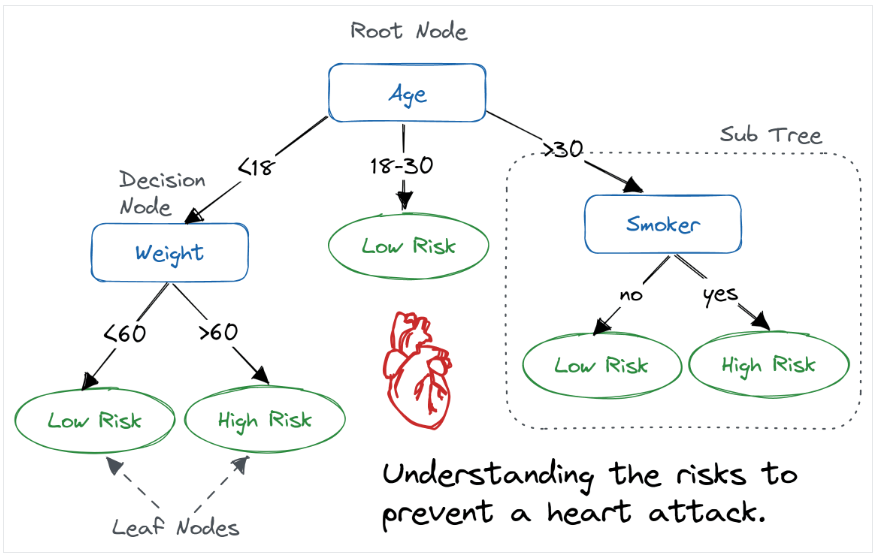

__1. Analysis__

In [6]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


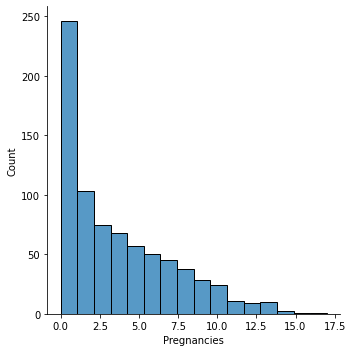

In [9]:
sns.displot(data['Pregnancies'])

#means from 0 to 1 there are approx 250 cases
# and max 17 cases

C:\Users\Mayur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

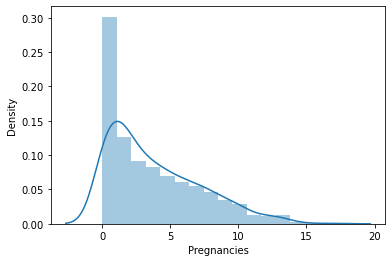

In [10]:
sns.distplot(data['Pregnancies'])

C:\Users\Mayur\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


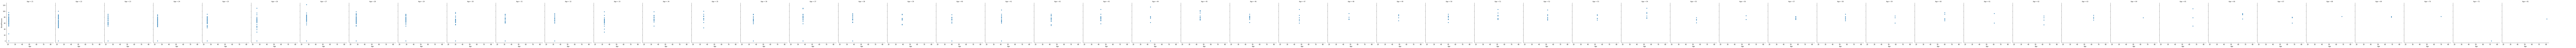

In [22]:
sea = sns.FacetGrid(data, col = "Age",  size=5)
sea.map(sns.scatterplot, "Age", "BloodPressure")
sea.add_legend()

<AxesSubplot:xlabel='Pregnancies'>

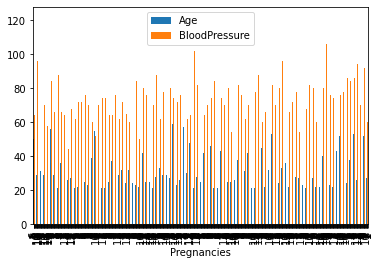

In [30]:
data.plot(x="Pregnancies", y=["Age", "BloodPressure"], kind="bar") 

<AxesSubplot:>

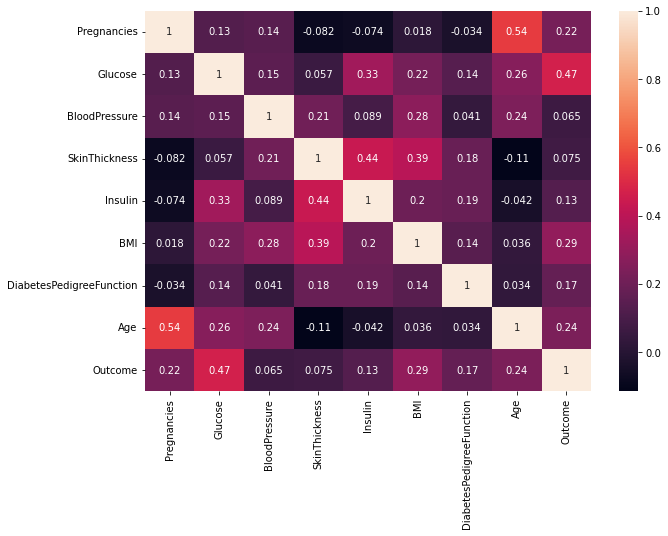

In [11]:
#heatmap range form -1 to +1 
#heatmap shows correlation between 2 variables

# close to +1: indicates more positive corr. bte 2 variables
# close to  0: there is no linear trend between the two variables
# close to -1: indicates more negative/ less positive corr. bte 2 variables
# diagonals are all 1 offwhite: correlating each variable to itself (so it's a perfect correlation).
                                                                                                  
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot= True)

__2. Feature Selection__

Here, you need to divide given columns into two types of variables __dependent__(or target variable) and __independent variable__ (or feature variables).

In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = data[feature_cols] # Features
y = data.Outcome # Target variable


__3. Splitting Data__

In [16]:
#70-30
# test_size=0.3   : 30%
# random_state=1  :1st time it will produce random values and then each time it will produce same result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [17]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


__4.Building Decision Tree Model__

In [18]:
#Create Decision Tree classifer object
dTree = DecisionTreeClassifier()

# Train Decision Tree Classifer
dTree = dTree.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dTree.predict(X_test)

In [20]:
X_test.shape

(231, 8)

In [21]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [22]:
y_pred.shape

(231,)

__5.Confusion matrix__ 

In [24]:
#from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[116  30]
 [ 39  46]]


In [26]:
#labelling

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()    #ravel(): convert 2D array into 1D and access each item
print("true negative: ", tn)
print("False positive: ", fp)
print("false negative: ", fn)
print("true positive: ", tp)

true negative:  116
False positive:  30
false negative:  39
true positive:  46


__6. Performance of model__

In [27]:
# from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))

Accuracy 0.7012987012987013
Precision 0.6052631578947368
Recall 0.5411764705882353


In [28]:
# from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       146
           1       0.61      0.54      0.57        85

    accuracy                           0.70       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



table explaination

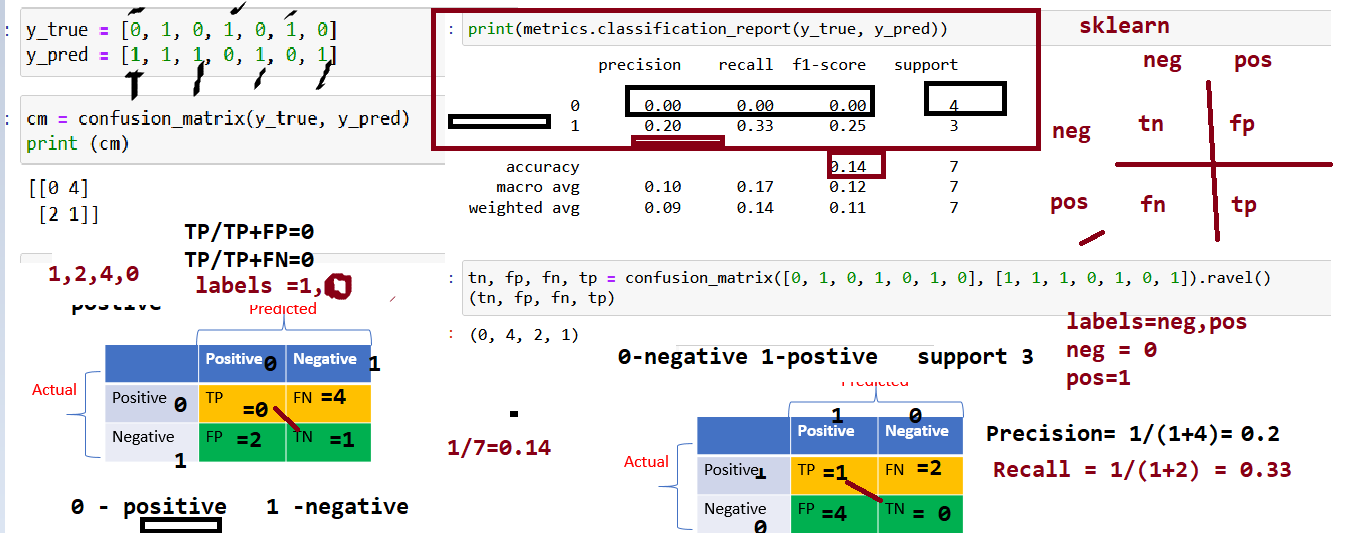

__7. Model Printing__

In [30]:
# initialize the classifier
mp = DecisionTreeClassifier(random_state=1, max_depth=3)
# train classifier 
mp = mp.fit(X_train, y_train)

The tree has:
 - 15 nodes
 - 8 leaves


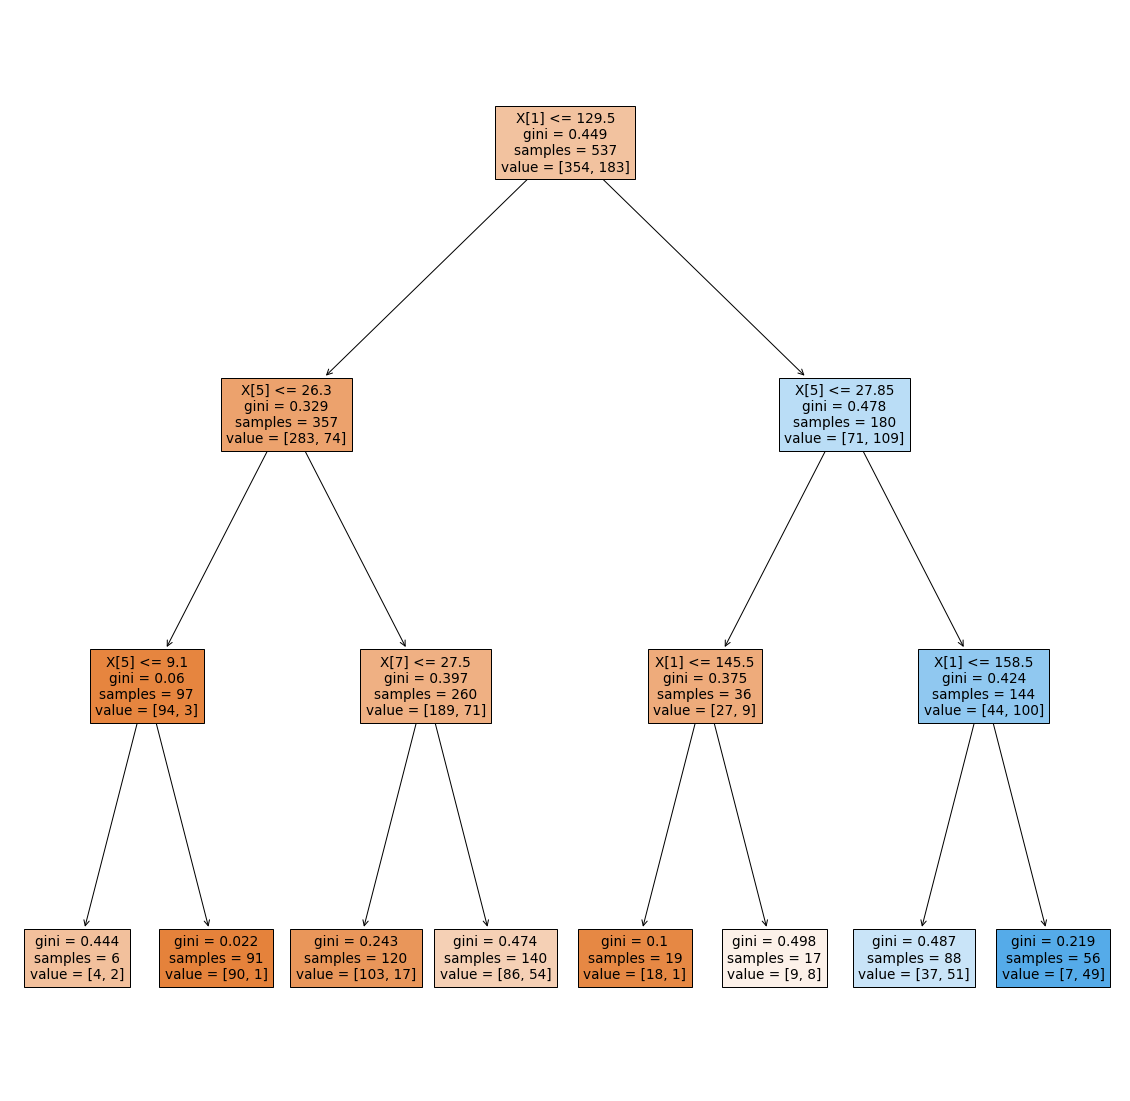

In [34]:
#from sklearn.tree import DecisionTreeClassifier, plot_tree

print('The tree has:\n - {} nodes\n - {} leaves'.format(mp.tree_.node_count, mp.tree_.n_leaves))

# tree visualisation
plt.figure(figsize=(20,20))
tree = plot_tree(mp, filled=True)

# krish

https://github.com/krishnaik06/Machine-Learning-Algorithms-Materials


### Decision Tree Classication
- TD3, CART
- Entropy __(0-1)__  __{__ here it contain log, so takes time to execute for large dataset  __}__ 
- gini index __(0-0.5)__  __{__ here normal precossing is done not log, so fast as compared to entropy for large dataset __}__ :-  purity- split


- Information Gain:- which feature should select __(feature with more information gain)__{gain by calculating entropy of roots}

- Hyper parameter: max-depth of tree, max-features, min sample leaf..
        
        post pruning: smaller dataset
        pre pruning: bigger tree
        


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#post pruning: small dataset  
#classification problem


from sklearn.datasets import load_iris


In [4]:
iris = load_iris()
iris   

#dataset is in the form of array

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
import seaborn as sns
df=sns.load_dataset('iris')
#this is diff dataset, here he have to do encoding

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
#independent features & depedent features
    
X=df.iloc[:,:-1]  #all col except species; since it is not independent
y=iris.target

In [10]:
X, y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [13]:
X_train   #based on this we are going to classify

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
# make model

treemodel = DecisionTreeClassifier()

In [31]:
#fit

treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.25, 0.21428571428571427, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 

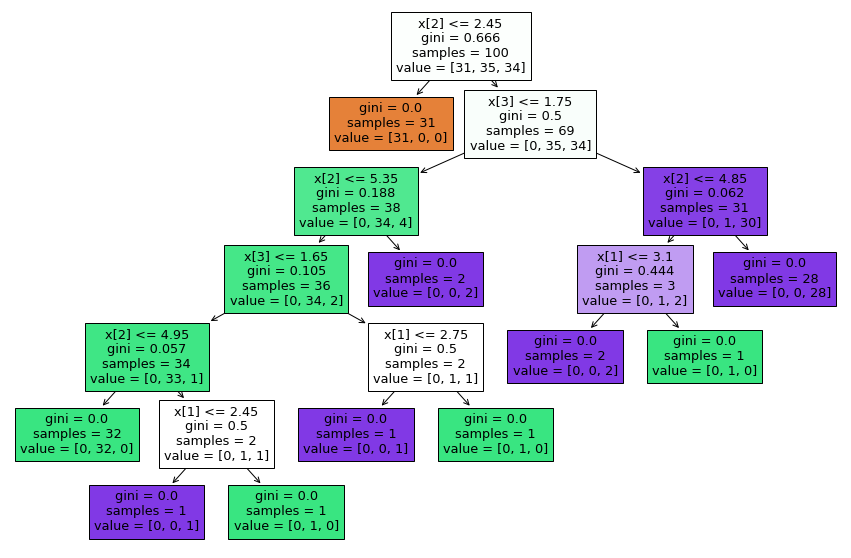

In [32]:
#construct

from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(treemodel, filled=True)  #box will be filled with color

So at level 2 we are getting majority split, rest all is a extra, hence use max depth

## Post Pruning

In [33]:
treemodel = DecisionTreeClassifier(max_depth=2)

In [34]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

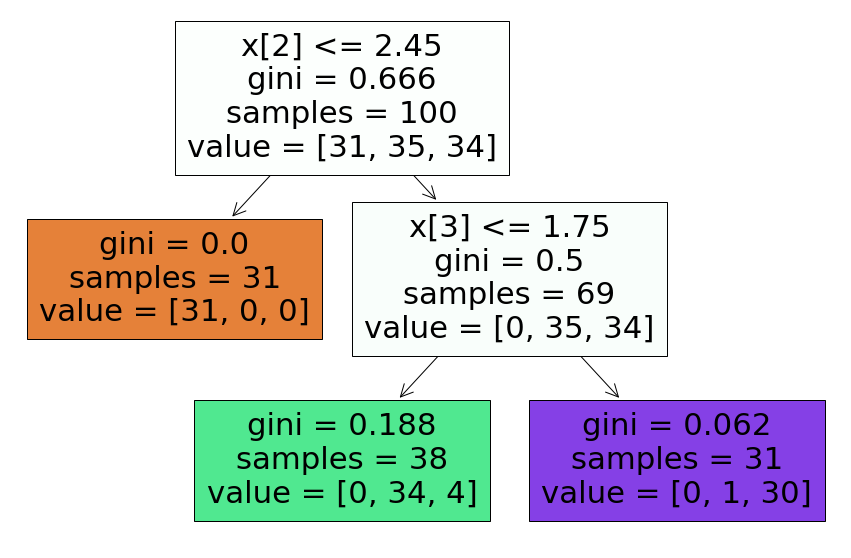

In [35]:
from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(treemodel, filled=True)  #box will be filled with color

In [37]:
#prediction

y_pred = treemodel.predict(X_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [38]:
from sklearn.metrics import accuracy_score, classification_report

In [39]:
score = accuracy_score(y_pred, y_test)
print(score)

0.98


In [40]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Pre Pruning

- criterion: {“gini”, “entropy”, “log_loss”}, default=”gini”
- splitter: {“best”, “random”}, default=”best”
- max_depth: int, default=None
- min_samples_split: int or float, default=2
- min_samples_leaf: int or float, default=1
- max_features

 __GridSearchCV__

In [46]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

#do experiment on all the parameters and find the best, for that 'GridSearchCV' helps.

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
treemodel = DecisionTreeClassifier()
cv= GridSearchCV(treemodel, param_grid= parameter, cv=5, scoring='accuracy')


__cv=5__: validation/test data:  total data/5= validation data [1000/5=200 will taken as validation data]

    - LOOCV ,  
    - K-fold(1/k(sum(MSE))), 
    - stratified CV. (fold in such a way that each fold is good representation of a complete dataset)
    
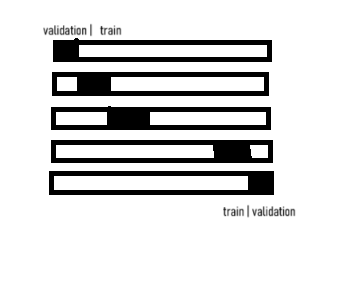

In [49]:
cv.fit(X_train, y_train)

C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Mayur\anaconda3\lib\site-packag

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [50]:
cv.best_params_

#there are idea features, now use this in tree

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [57]:
y_pred = cv.predict(X_test)  #always do on test otherwise dimension of y_test will not match
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [58]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [59]:
from sklearn.metrics import accuracy_score, classification_report

In [60]:
score = accuracy_score(y_pred, y_test)
score

#issue with size of y_test

0.98

In [62]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



__prediction on ytrain__

In [65]:
y_pred = cv.predict(X_train)  #always do on test otherwise dimension of y_test will not match
y_pred

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [66]:
y_train

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [67]:
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.89      0.94      0.91        33
           2       0.94      0.89      0.91        36

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



___

### Decision Tree Regression

- output will be continuous
- here we cannot use entropy/gini

__variance reduction__: used to select best split node among all
- __select node with high variance reduction__

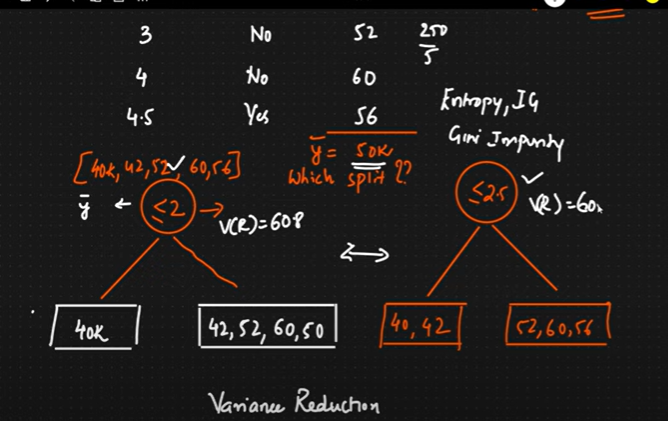
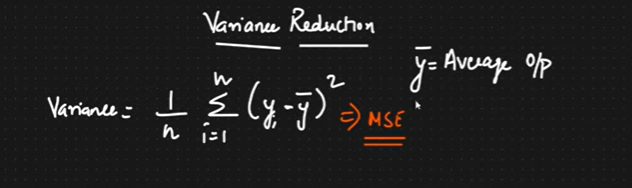

__variance of roots will be same__
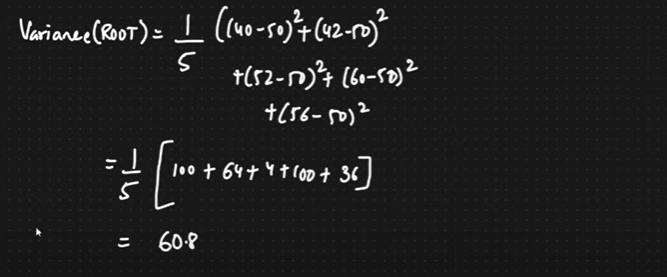

__variance of childs__
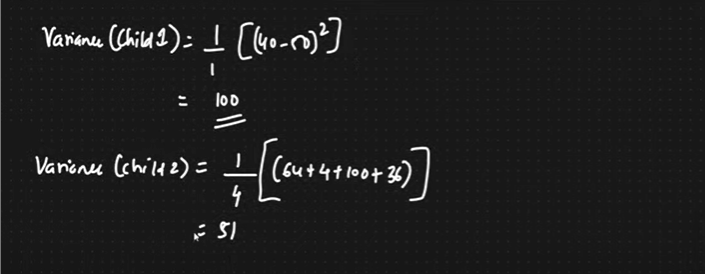

__variance reduction calculation__
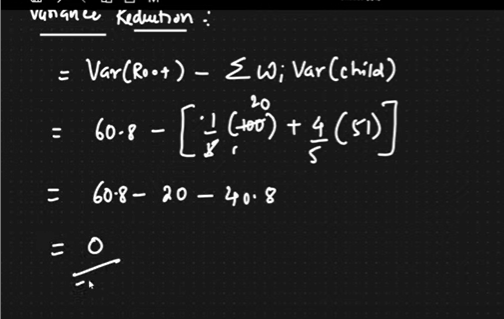


In [14]:

from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

#boston is removed scikit-learn since version 1.2.

In [15]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [16]:
#independent features

X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

#dependent features

y= california_housing.target

In [17]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
#train test split

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [20]:
regressor.fit(X_train,y_train)


DecisionTreeRegressor()

In [21]:
y_pred=regressor.predict(X_test)


In [22]:
y_pred

array([0.565  , 0.521  , 5.00001, ..., 1.264  , 1.389  , 4.25   ])

In [23]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [24]:
score

0.5979583152849859

In [25]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}
regressor=DecisionTreeRegressor()

In [26]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')

In [27]:
regressorcv.fit(X_train,y_train)

C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
440 fits failed out of a total of 1320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
440 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Mayur\anaconda3\lib\site-packa

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [28]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 11,
 'max_features': 'log2',
 'splitter': 'best'}

In [29]:
y_pred=regressorcv.predict(X_test)

In [30]:
r2_score(y_pred,y_test)

0.5337137898324051